In [1]:
# Importing the necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [4]:
# Creating a blob of 500 data points
data=make_blobs(n_samples=500,
               n_features=2,
               centers=4,
               cluster_std = 1.6,
               random_state=50)

In [5]:
data

(array([[ -2.84090177,  10.88720663],
        [  4.01921396,  -6.12562866],
        [ -6.3670829 ,  -4.50263006],
        [ -0.55798628,  -2.70088621],
        [ -5.45597702,  -5.67235928],
        [ -6.65979997,  -2.95768695],
        [ -1.82469742,   8.18386797],
        [ -3.43667569,   9.32972882],
        [ -7.77938242,   0.88398026],
        [  1.08654318,  -6.94815805],
        [ -7.48108489,  -4.16057155],
        [ -0.61150386,  -3.24108804],
        [ -3.05388683,  -1.59477759],
        [ -2.86609399,   9.25437115],
        [ -6.35051205,  -1.12637709],
        [ -6.30458498,  -2.13425027],
        [  1.28469747,  -4.23998138],
        [ -2.95127638,   6.5086141 ],
        [ -2.41263169,   6.63119386],
        [  0.34273755,   3.68955793],
        [ -2.45800619,   9.55684161],
        [ -7.156514  ,  -1.8460631 ],
        [ -0.35459149,   5.95321352],
        [ -3.93825418,   7.78348142],
        [ -2.82671631,   4.97669646],
        [ -2.14305011,   9.39286516],
        [ -3

In [6]:
df=data[0]

In [11]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

### Generating a Dendrogram

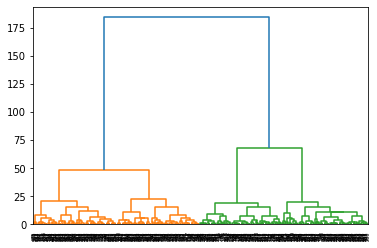

In [12]:
dendogram=sch.dendrogram(sch.linkage(df,method="ward"))

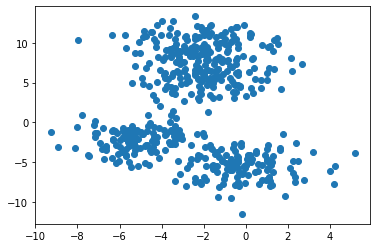

In [14]:
plt.scatter(data[0][:,0], data[0][:,1]) 
plt.show()
# plt.scatter(df[:,0],df[:,1]) can be used

## Clustering

In [17]:
hc=AgglomerativeClustering(n_clusters=4)

In [18]:
y_hc=hc.fit_predict(df)
y_hc

In [25]:
np.unique(y_hc)

array([0, 1, 2, 3], dtype=int64)

In [83]:
from sklearn.neighbors import NearestCentroid

clf = NearestCentroid()
clf.fit(df, y_hc)
print(clf.centroids_)

[[-2.43958437  9.92252537]
 [-1.6756598   5.6385697 ]
 [-5.12343395 -2.12761947]
 [-0.14427367 -5.55079228]]


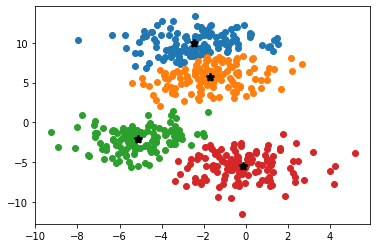

In [87]:
plt.scatter(df[y_hc==0,0], df[y_hc==0,1])
plt.scatter(df[y_hc==1,0], df[y_hc==1,1])
plt.scatter(df[y_hc==2,0], df[y_hc==2,1])
plt.scatter(df[y_hc==3,0], df[y_hc==3,1])
plt.scatter(clf.centroids_[:,0],clf.centroids_[:,1], marker="*", color="black", linewidth=3)
plt.show()

# Can also be done through creating a database as shown below

In [50]:
import pandas as pd

In [52]:
df_new=pd.DataFrame(df, columns= ["A","B"])

In [53]:
df_new

,A,B
0,-2.840902,10.887207
1,4.019214,-6.125629
2,-6.367083,-4.502630
3,-0.557986,-2.700886
4,-5.455977,-5.672359
...,...,...
495,-1.073339,6.068130
496,-5.608449,-0.970125
497,-3.158529,6.198507
498,-1.441878,-4.022099


In [55]:
df_new["Cluster"]=y_hc
df_new

,A,B,Cluster
0,-2.840902,10.887207,0
1,4.019214,-6.125629,3
2,-6.367083,-4.502630,2
3,-0.557986,-2.700886,3
4,-5.455977,-5.672359,2
...,...,...,...
495,-1.073339,6.068130,1
496,-5.608449,-0.970125,2
497,-3.158529,6.198507,1
498,-1.441878,-4.022099,3
